In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df = df[['math score', 'reading score', 'writing score']]

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     1000 non-null   int64
 1   reading score  1000 non-null   int64
 2   writing score  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [6]:
df.dtypes

math score       int64
reading score    int64
writing score    int64
dtype: object

In [7]:
df.rename(columns={
    'math score': 'math',
    'reading score': 'reading',
    'writing score': 'writing'
}, inplace=True)
df.head(5)

,math,reading,writing
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


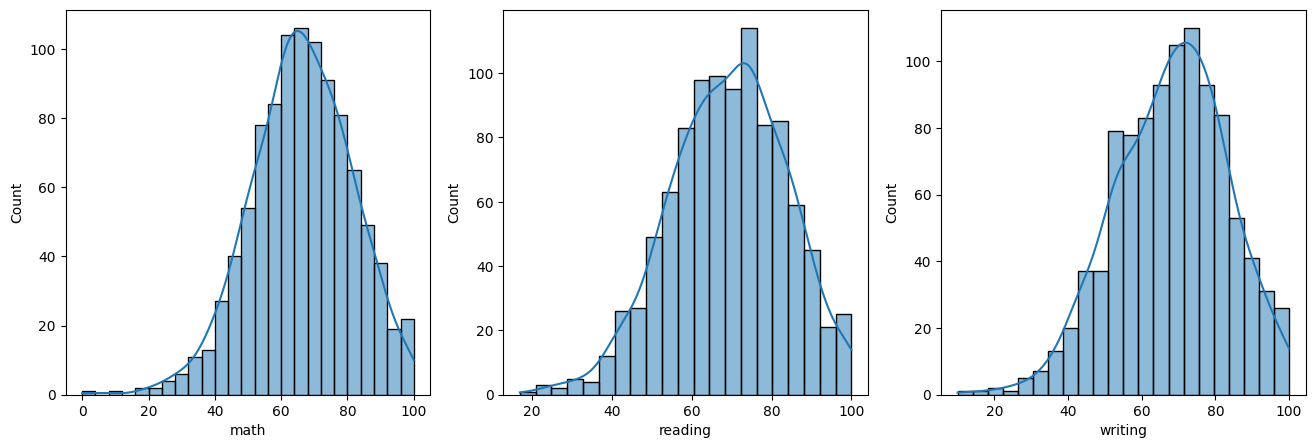

In [9]:
fig = plt.figure(figsize=(16,5))
for i in range(len(df.columns)):
    col = df.columns[i]
    sub = fig.add_subplot(1,3,i+1)
    sns.histplot(data=df, x=col, kde=True)


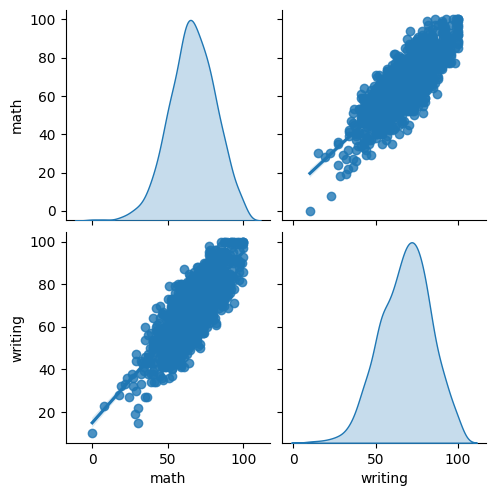

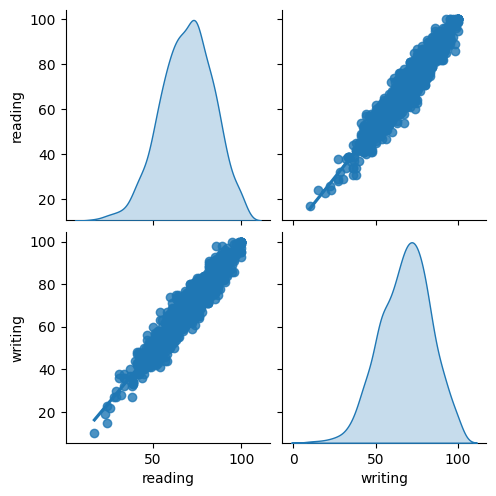

In [16]:
for i in range(len(df.iloc[:, :-1].columns)):
    col = df.columns[i]
    sns.pairplot(data=df[[col, 'writing']], diag_kind='kde', kind='reg')


In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X

,math,reading
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78
...,...,...
995,88,99
996,62,55
997,59,71
998,68,78


In [18]:
y 

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing, Length: 1000, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.index


Index([ 29, 535, 695, 557, 836, 596, 165, 918, 495, 824,
       ...
       121, 614,  20, 700,  71, 106, 270, 860, 435, 102],
      dtype='int64', length=800)

In [21]:
X_test.index

Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
       ...
       948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
      dtype='int64', length=200)

In [22]:
scaller = StandardScaler()


In [23]:
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

In [24]:
linear = LinearRegression()

linear.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred = linear.predict(X_test_scaled)

In [26]:
y_pred

array([85.59822883, 64.17343143, 72.63647191, 75.96410913, 82.29300047,
       74.58185589, 69.04967819, 59.55634117, 73.12921131, 52.78269291,
       45.79787062, 25.05457777, 78.2838587 , 62.95436974, 80.48839918,
       76.26808337, 51.04848296, 45.56428772, 56.32150416, 63.44710914,
       71.62858425, 49.40707321, 70.17277493, 50.78932646, 78.26144983,
       74.51146455, 72.72927212, 56.69586974, 45.96106217, 56.3918955 ,
       60.11947191, 60.75299399, 61.99446455, 70.4799139 , 76.66802256,
       51.42284854, 77.11277948, 75.61215242, 76.83121411, 14.50537063,
       74.65224723, 65.01812754, 60.47142862, 61.43133381, 86.46533381,
       61.78329053, 69.4016349 , 27.79667539, 87.33243878, 80.72198207,
       73.87794247, 74.32269939, 78.19105848, 54.44651152, 71.86216714,
       72.79966346, 77.88708425, 53.27543231, 84.37916714, 88.92586605,
       40.24328404, 82.31540934, 76.45684853, 59.83790654, 87.91797839,
       72.58848944, 69.00169571, 52.40832733, 61.71289918, 93.40

In [28]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.9018108855760416
mean_absolute_error: 3.8380082149660892
mean_absolute_percentage_error: 0.06214932600113702
root_mean_squared_error: 4.8646935501006965
